# Classification of the dataset using extracted features

- Set to `true` if runnig in Colab

In [33]:
RUNNING_IN_COLAB = False

### Import google drive

In [34]:
if RUNNING_IN_COLAB:

    from google.colab import drive

    #Mount drive
    drive.mount('/content/drive', force_remount=True)

### Import modules

In [35]:
import pandas

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns  

### Reading dataset CSV

In [36]:
if RUNNING_IN_COLAB:
    CSV_PATH = '/content/drive/My Drive/Colab Notebooks/All_Infogain.csv'
else:   
    CSV_PATH = '../../dataset/FinalDataset/All_Infogain.csv'

CLASS_LABEL_COLUMN = 'class'

# Reads CSV file with data
df = pandas.read_csv(CSV_PATH, index_col=0)

#Remove values with 'NaN'
df.dropna(inplace=True)

#Resets index 
df = df.reset_index()

df.head()

,avgpathtokenlen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,CharacterContinuityRate,NumberRate_URL,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain,class
0,105.0,0.876,0.008,0.087,0.095,9.174,0.010,0.435,0.199,0.219,-1.0,0.904,phishing
1,66.0,0.874,0.009,0.091,0.096,9.136,0.010,0.682,0.257,0.293,-1.0,0.870,phishing
2,66.0,0.874,0.009,0.091,0.096,9.136,0.010,0.682,0.000,0.000,-1.0,0.870,phishing
3,66.0,0.874,0.009,0.091,0.096,9.136,0.010,0.682,0.000,0.000,-1.0,0.870,phishing
4,65.0,0.948,0.006,0.182,0.032,30.000,0.006,0.727,0.141,0.141,-1.0,1.000,benign


### Split data into X and Y

In [37]:
#X is a matrix, with all the samples feature array
X = df.iloc[:, :-1].values
print(X)

print('\n')

#Y is the class of the samples
Y = df.iloc[:, -1].values
print(Y)

[[ 1.05e+02  8.76e-01  8.00e-03 ...  2.19e-01 -1.00e+00  9.04e-01]
 [ 6.60e+01  8.74e-01  9.00e-03 ...  2.93e-01 -1.00e+00  8.70e-01]
 [ 6.60e+01  8.74e-01  9.00e-03 ...  0.00e+00 -1.00e+00  8.70e-01]
 ...
 [ 1.00e+00  9.80e-02  4.90e-02 ...  0.00e+00 -1.00e+00  7.29e-01]
 [ 1.00e+00  1.05e-01  5.30e-02 ...  0.00e+00 -1.00e+00  7.14e-01]
 [ 6.67e-01  1.25e-01  5.00e-02 ...  0.00e+00 -1.00e+00  8.61e-01]]


['phishing' 'phishing' 'phishing' ... 'phishing' 'phishing' 'phishing']


### Normalize data

In [38]:
from sklearn.preprocessing import normalize

X_norm = normalize(X)
print(X_norm)

[[ 9.96075809e-01  8.31011818e-03  7.58914902e-05 ...  2.07752955e-03
  -9.48643628e-03  8.57573840e-03]
 [ 9.90203040e-01  1.31126887e-02  1.35027687e-04 ...  4.39590138e-03
  -1.50030764e-02  1.30526764e-02]
 [ 9.90219969e-01  1.31129129e-02  1.35029996e-04 ...  0.00000000e+00
  -1.50033329e-02  1.30528996e-02]
 ...
 [ 5.10214176e-01  5.00009892e-02  2.50004946e-02 ...  0.00000000e+00
  -5.10214176e-01  3.71946134e-01]
 [ 5.01837833e-01  5.26929725e-02  2.65974052e-02 ...  0.00000000e+00
  -5.01837833e-01  3.58312213e-01]
 [ 3.74073965e-01  7.01038166e-02  2.80415266e-02 ...  0.00000000e+00
  -5.60830533e-01  4.82875089e-01]]


### Execute KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X_norm ,Y, test_size=0.2, random_state=5)

knn =  KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

  Defacement       0.89      0.90      0.89      1554
      benign       0.85      0.89      0.87      1542
     malware       0.86      0.90      0.88      1338
    phishing       0.82      0.77      0.80      1456
        spam       0.93      0.90      0.92      1394

    accuracy                           0.87      7284
   macro avg       0.87      0.87      0.87      7284
weighted avg       0.87      0.87      0.87      7284



### Plot graph with KNN results

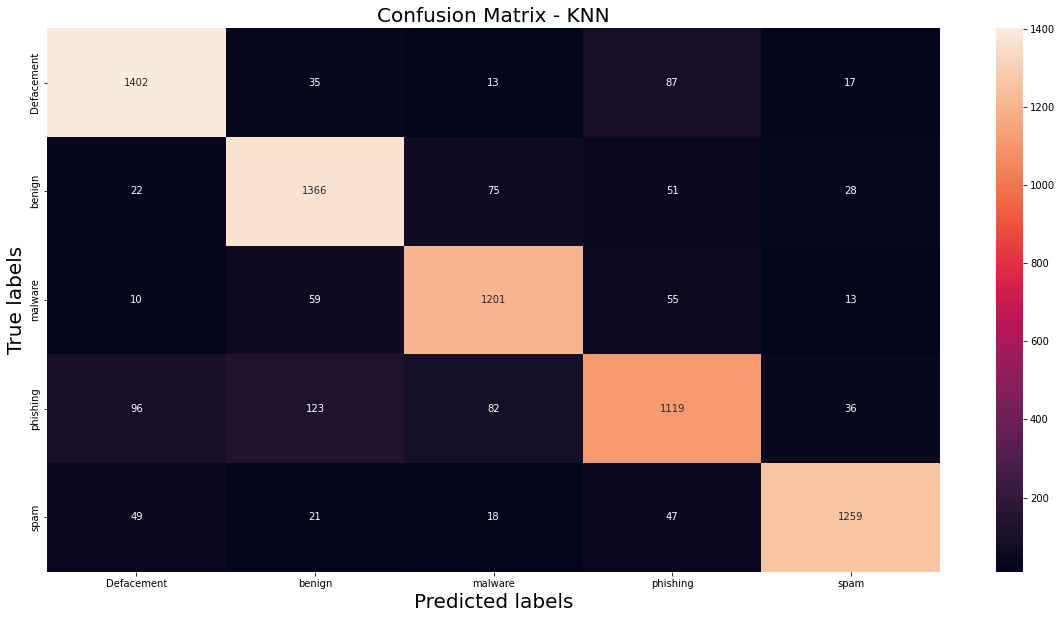

In [40]:
ax= plt.subplot()
#annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm, annot=True, fmt='g' ,ax=ax)  

# labels, title and ticks
ax.set_title('Confusion Matrix - KNN', fontsize=20)
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)

classes = ['Defacement', 'benign', 'malware', 'phishing', 'spam']

ax.xaxis.set_ticklabels(classes, fontsize=10)
ax.yaxis.set_ticklabels(classes, fontsize=10)

plt.gcf().set_size_inches(20, 10)

### Execute RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X_norm ,Y, test_size=0.2, random_state=5)

rf =  RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

  Defacement       0.95      0.93      0.94      1554
      benign       0.91      0.95      0.93      1542
     malware       0.97      0.96      0.96      1338
    phishing       0.87      0.89      0.88      1456
        spam       0.97      0.94      0.95      1394

    accuracy                           0.93      7284
   macro avg       0.93      0.93      0.93      7284
weighted avg       0.93      0.93      0.93      7284



### Plot graph with RandomForest results

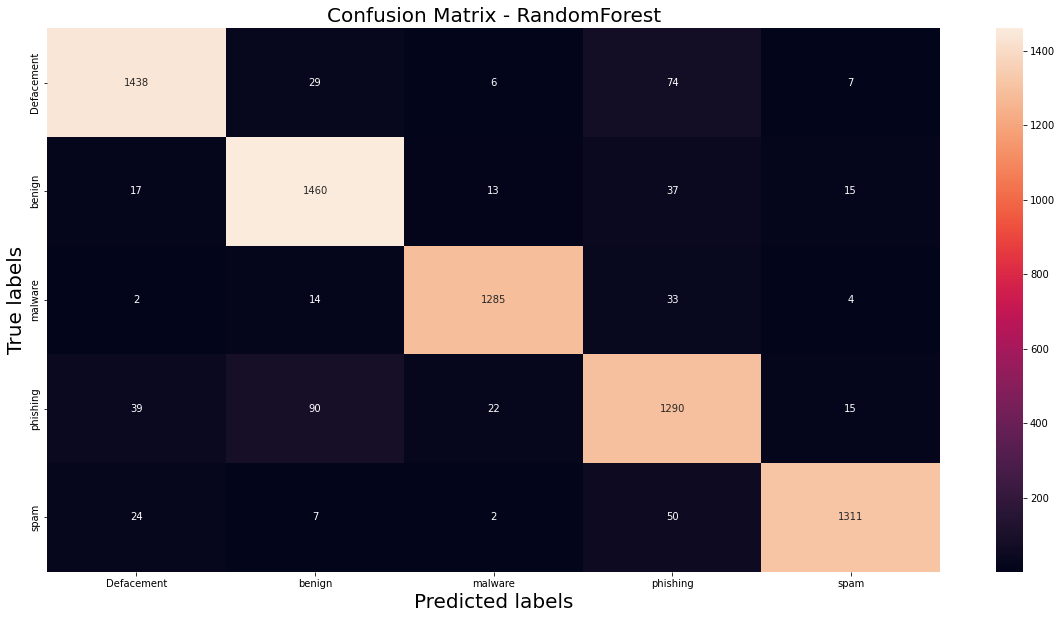

In [42]:
ax= plt.subplot()
#annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm, annot=True, fmt='g' ,ax=ax)  

# labels, title and ticks
ax.set_title('Confusion Matrix - RandomForest', fontsize=20)
ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize=20)

classes = ['Defacement', 'benign', 'malware', 'phishing', 'spam']

ax.xaxis.set_ticklabels(classes, fontsize=10)
ax.yaxis.set_ticklabels(classes, fontsize=10)

plt.gcf().set_size_inches(20, 10)